In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
fromage = pd.read_csv("http://www.math.u-bordeaux.fr/~mchave100p/wordpress/wp-content/uploads/2013/10/fromage.txt",sep="\t",header=0,index_col=0)

In [2]:
fromage


calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Babybel                  314   238.0    209.8     25.1     63.7      6.4   
Beaufort                 401   112.0    259.4     33.3     54.9      1.2   
Bleu                     342   336.0    211.1     28.9     37.1     27.5   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Cantal                   367   256.0    264.0     28.8     48.8      5.7   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Comte                    399    92.0    220.5     32.4     55.9      1.3   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Edam                     327   148.0    272.2     24.7     65.7      5.5   
Emmental                 378    60.0    308.2     29.4     56.3      2.4   
Fr.chevrepatemolle       206   160.0     72.8     18.5    150.5     31.0   
Fr.fondu.45              292   390.0    168.5     24.0     77.4      5.5   
Fr.frais20nat.            80    41.0    146.3      3.5     50.0     20.0   
Fr.frais40nat.           115    25.0     94.8      7.8     64.3     22.6   
Maroilles                338   311.0    236.7     29.1     46.7      3.6   
Morbier                  347   285.0    219.0     29.5     57.6      5.8   
Parmesan                 381   240.0    334.6     27.5     90.0      5.2   
Petitsuisse40            142    22.0     78.2     10.4     63.4     20.4   
PontlEveque              300   223.0    156.7     23.4     53.0      4.0   
Pyrenees                 355   232.0    178.9     28.0     51.5      6.8   
Reblochon                309   272.0    202.3     24.6     73.1      8.1   
Rocquefort               370   432.0    162.0     31.2     83.5     13.3   
SaintPaulin              298   205.0    261.0     23.3     60.4      6.7   
Tome                     321   252.0    125.5     27.3     62.3      6.2   
Vacherin                 321   140.0    218.0     29.3     49.2      3.7   
Yaourtlaitent.nat.        70    91.0    215.7      3.4     42.9      2.9   

                    proteines  cholesterol  magnesium  
Fromages                                               
CarredelEst              21.0           70         20  
Babybel                  22.6           70         27  
Beaufort                 26.6          120         41  
Bleu                     20.2           90         27  
Camembert                23.4           60         20  
Cantal                   23.0           90         30  
Chabichou                19.5           80         36  
Chaource                 17.8           70         25  
Cheddar                  26.0          110         28  
Comte                    29.2          120         51  
Coulomniers              20.5           80         13  
Edam                     24.7           80         44  
Emmental                 29.4          110         45  
Fr.chevrepatemolle       11.1           50         16  
Fr.fondu.45              16.8           70         20  
Fr.frais20nat.            8.3           10         11  
Fr.frais40nat.            7.0           30         10  
Maroilles                20.4           90         40  
Morbier                  23.6           80         30  
Parmesan                 35.7           80         46  
Petitsuisse40             9.4           20         10  
PontlEveque              21.1           70         22  
Pyrenees                 22.4           90         25  
Reblochon                19.7           80         30  
Rocquefort               18.7          100         25  
SaintPaulin              23.3           70         26  
Tome                     21.8           80         20  
Vacherin                 17.6          

In [3]:
# on centre et on réduit

import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fromage_cr = sc.fit_transform(fromage.values)

In [4]:
#dimension des données

print(fromage.shape)

#statistiques descriptives

print(fromage.describe())




(29, 9)
         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80

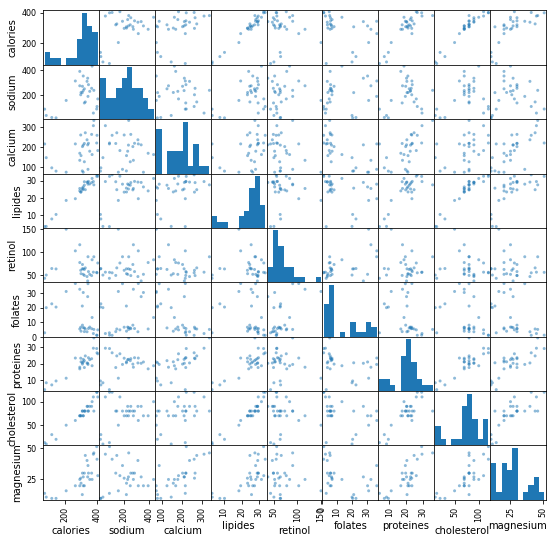

In [5]:
#graphique - croisement deux à deux des variables

scatt_mat = scatter_matrix(fromage,figsize=(9,9))[-1]

## CAH

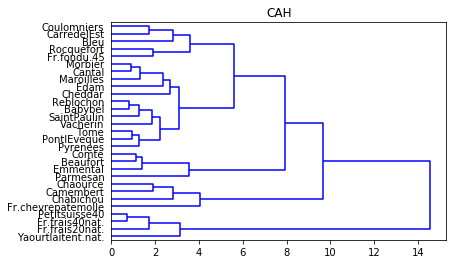

In [6]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(fromage_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=fromage.index,orientation='right',color_threshold=0)
plt.show()

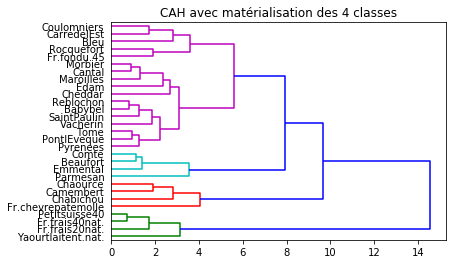

In [7]:
#matérialisation des 4 classes (hauteur t = 7)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='right',color_threshold=7)
plt.show()



In [8]:
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)


[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


In [9]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(fromage.index[idg],groupes_cah[idg]))


             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


Le 1er groupe est constitué de fromages frais.  
Le 2nd de fromages à pâte molle.  
Le 3ème de fromages durs.  
Le 4ème est un peu fourre-tout.  


## K-means

In [10]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(fromage_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))



[2 0 3 0 2 0 2 2 0 3 2 3 3 2 0 1 1 0 0 3 1 0 0 0 0 0 0 0 1]
             Fromages
0         Fr.fondu.45
0             Babybel
0                Tome
0                Bleu
0         SaintPaulin
0              Cantal
0          Rocquefort
0           Reblochon
0             Cheddar
0            Pyrenees
0         PontlEveque
0             Morbier
0           Maroilles
0            Vacherin
1       Petitsuisse40
1      Fr.frais40nat.
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
2  Fr.chevrepatemolle
2         Coulomniers
2            Chaource
2           Chabichou
2           Camembert
2         CarredelEst
3            Emmental
3            Parmesan
3                Edam
3               Comte
3            Beaufort


In [11]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(fromage_cr),index = fromage.index)
print(dist_data)

                           0         1         2         3
Fromages                                                  
CarredelEst         2.919238  5.525639  2.223661  5.216997
Babybel             0.743747  5.190152  3.017874  2.793381
Beaufort            2.855400  7.505349  5.161412  1.145392
Bleu                2.105363  6.124589  3.236961  3.900395
Camembert           3.542924  5.403772  1.933430  5.102763
Cantal              1.193917  6.296011  4.024862  2.200693
Chabichou           3.387208  5.925956  1.778697  4.530170
Chaource            3.458020  5.554870  1.032372  5.090642
Cheddar             1.953053  6.824554  3.748034  2.291313
Comte               3.420311  7.842530  5.442474  1.352273
Coulomniers         2.489154  4.842860  1.957956  4.749377
Edam                2.254039  6.125677  4.229224  1.344287
Emmental            3.396041  7.477880  5.526302  0.902128
Fr.chevrepatemolle  5.542923  5.010448  3.097303  7.093877
Fr.fondu.45         1.887493  5.282331  2.837017  4.4492

In [12]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0  1  2  3
row_0             
1       0  4  0  0
2       0  0  4  0
3       0  0  0  4
4      14  0  2  1

Il y bien correspondances entre les groupes proposés par la CAH et la méthode des K-means.
Les deux groupes 1 sont identiques, et il y a de fortes correspondances dans les autres.

[0.48626255 0.33609921 0.33464766 0.31792034 0.27165289 0.31482664
 0.2459694  0.21012122 0.26464697 0.20565255 0.18506666 0.21782977
 0.20921078 0.19755177 0.17616808]


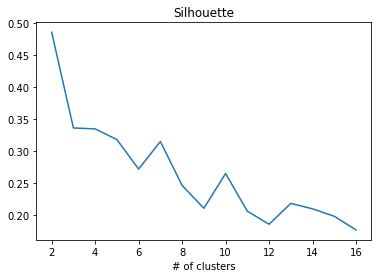

In [13]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.silhouette_score(fromage_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

le nombre de groupes le plus adapté au sens de la metric "silhouette" est 2.

[20.70252871 20.63325164 21.46005127 20.182315   18.65410496 16.42903331
 15.72398686 15.55120006 15.06597866 15.69080219 15.39911717 16.70913363
 16.91267322 16.75244656 16.56699801]


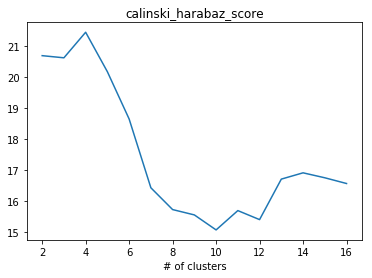

In [14]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.calinski_harabaz_score(fromage_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

le nombre de groupe le plus adapté au sens de la metric "calinski_harabaz_score" est 4.

D'autres metrics....  ('https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics')

## interprétation des classes


In [19]:
#moyenne par variable

m = fromage.mean()

#TSS

TSS = fromage.shape[0]*fromage.var(ddof=0)
print(TSS)


calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
dtype: float64


In [20]:
#data.frame conditionnellement aux groupes

gb = fromage.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)


0     6
1     5
2     4
3    14
dtype: int64


In [21]:
#moyennes conditionnelles

mk = gb.mean()
print(mk)

#pour chaque groupe écart à la moyenne par variable

EMk = (mk-m)**2

#pondéré par les effectifs du groupe

EM = EMk.multiply(nk,axis=0)


     calories      sodium  calcium    lipides    retinol    folates  \
0  288.000000  252.916667   110.10  23.866667  95.866667  31.266667   
1  377.200000  130.400000   278.98  29.460000  64.560000   3.120000   
2  101.750000   44.750000   133.75   6.275000  55.150000  16.475000   
3  334.285714  267.428571   199.70  27.500000  60.050000   7.728571   

   proteines  cholesterol  magnesium  
0  18.883333    68.333333  21.666667  
1  29.120000   102.000000  45.400000  
2   7.200000    18.250000  11.250000  
3  21.228571    83.571429  27.142857  


In [22]:
#somme des valeurs => BSS

BSS = np.sum(EM,axis=0)
print(BSS)


calories       204332.558374
sodium         198134.447578
calcium         91337.127517
lipides          1576.637511
retinol          6258.237943
folates          2927.429492
proteines        1099.017164
cholesterol     17817.522578
magnesium        2855.967898
dtype: float64


In [23]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable

R2 = BSS/TSS
print(R2)

calories       0.863799
sodium         0.599117
calcium        0.620108
lipides        0.851983
retinol        0.382815
folates        0.760722
proteines      0.810316
cholesterol    0.797596
magnesium      0.796207
dtype: float64


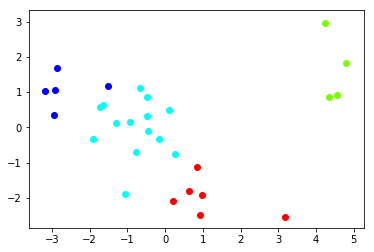

In [24]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(fromage_cr)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

#### problème:
le groupe 1 ici en bleu, écrase les autres données en la tassant dans une partie du graphe.  
Il convient donc d'exclure ces données et de recommencer l'ACP dans un autre plan que ce plan factoriel.

In [25]:
#retirer des observations le groupe n°1 du k-means précédent
fromage_subset = fromage.iloc[kmeans.labels_!=1,:]

print(fromage_subset.shape)
print(fromage_subset)

(24, 9)
                    calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Babybel                  314   238.0    209.8     25.1     63.7      6.4   
Bleu                     342   336.0    211.1     28.9     37.1     27.5   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Cantal                   367   256.0    264.0     28.8     48.8      5.7   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Fr.chevrepatemolle       206   160.0     72.8     18.5    150.5     31.0   
Fr.fondu.45              292   390.0    168.5     24.0     77.4      5.5   
Fr.f

In [26]:
#centrer et réduire
fromage_subset_cr = sc.fit_transform(fromage_subset.values)
print(fromage_subset_cr)

[[ 0.33158714  1.18845545 -1.55672388  0.39375271 -0.6546465   1.31077268
   0.46607362  0.04341044 -0.39786259]
 [ 0.33158714  0.10601796  0.72250262  0.24818046 -0.17710482 -0.74629766
   0.74269227  0.04341044  0.49334961]
 [ 0.64063923  1.02444977  0.74409879  0.70915924 -1.2269072   1.06977699
   0.32776429  0.81515152  0.49334961]
 [-0.2202916   0.8182712   0.82383849 -0.43115669  1.37391899  1.835799
   0.8810016  -0.34246011 -0.39786259]
 [ 0.9165786   0.27470951  1.62289676  0.69702822 -0.76515201 -0.80654658
   0.81184694  0.81515152  0.87529769]
 [ 0.66271438 -0.32508269 -1.31418229  0.58784903  0.86480431  1.82719201
   0.20674363  0.42928098  1.63919386]
 [ 0.0887605   0.46214458 -0.55499387  0.28457352  1.90276681  1.50012643
  -0.08716369  0.04341044  0.23871755]
 [ 1.34704401 -0.51251775  0.26566057  1.14587598  0.32411662 -0.87540249
   1.33050692  1.5868926   0.62066564]
 [ 0.26536169 -0.04393009 -1.44708179  0.30883556 -0.18105144  0.5189297
   0.37963029  0.42928098

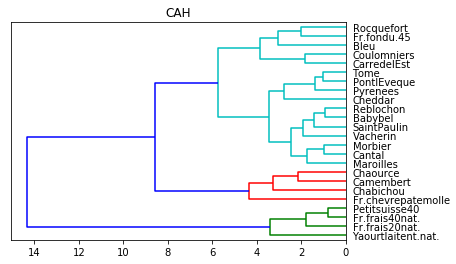

[3 3 3 2 3 2 2 3 3 2 3 1 1 3 3 1 3 3 3 3 3 3 3 1]


In [27]:
#générer la matrice des liens

Z_subset = linkage(fromage_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=fromage_subset.index,orientation='left',color_threshold=7)
plt.show()

#groupes

groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

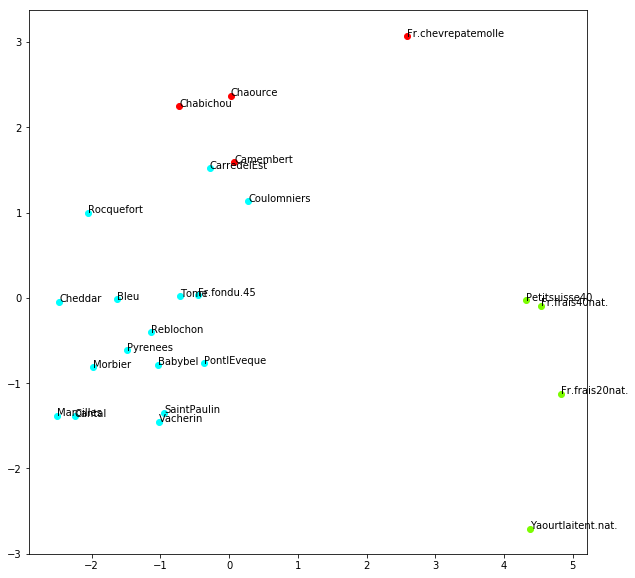

In [28]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(fromage_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['lawngreen','red','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(fromage_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()

Quelques fromages ont changé de camp...

## Exercice:

Sur le jeu de données suivant: 
    * extraire les données sur les dimensions des pétales
    * effectuer une CAH
    * utilisiser la méthode K-Means
    * Comparer les méthode
    * peut-on dire que la classification est bonne comparée au numéro de l'espèce donné?
    * effectuer une ACP
    * doit-on recommencer en excluant un groupe?


In [29]:
df = pd.read_excel('../data/Iris.xls')   # attention au chemin!!!!!
df

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0             1          0.2           1.4          3.5           5.1   
1             1          0.2           1.4          3.0           4.9   
2             1          0.2           1.3          3.2           4.7   
3             1          0.2           1.5          3.1           4.6   
4             1          0.2           1.4          3.6           5.0   
5             1          0.4           1.7          3.9           5.4   
6             1          0.3           1.4          3.4           4.6   
7             1          0.2           1.5          3.4           5.0   
8             1          0.2           1.4          2.9           4.4   
9             1          0.1           1.5          3.1           4.9   
10            1          0.2           1.5          3.7           5.4   
11            1          0.2           1.6          3.4           4.8   
12            1          0.1           1.4          3.0           4.8   
13            1          0.1           1.1          3.0           4.3   
14            1          0.2           1.2          4.0           5.8   
15            1          0.4           1.5          4.4           5.7   
16            1          0.4           1.3          3.9           5.4   
17            1          0.3           1.4          3.5           5.1   
18            1          0.3           1.7          3.8           5.7   
19            1          0.3           1.5          3.8           5.1   
20            1          0.2           1.7          3.4           5.4   
21            1          0.4           1.5          3.7           5.1   
22            1          0.2           1.0          3.6           4.6   
23            1          0.5           1.7          3.3           5.1   
24            1          0.2           1.9          3.4           4.8   
25            1          0.2           1.6          3.0           5.0   
26            1          0.4           1.6          3.4           5.0   
27            1          0.2           1.5          3.5           5.2   
28            1          0.2           1.4          3.4           5.2   
29            1          0.2           1.6          3.2           4.7   
..          ...          ...           ...          ...           ...   
120           3          2.3           5.7          3.2           6.9   
121           3          2.0           4.9          2.8           5.6   
122           3          2.0           6.7          2.8           7.7   
123           3          1.8           4.9          2.7           6.3   
124           3          2.1           5.7          3.3           6.7   
125           3          1.8           6.0          3.2           7.2   
126           3          1.8           4.8          2.8           6.2   
127           3          1.8           4.9          3.0           6.1   
128           3          2.1           5.6          2.8           6.4   
129           3          1.6           5.8          3.0           7.2   
130           3          1.9           6.1          2.8           7.4   
131           3          2.0           6.4          3.8           7.9   
132           3          2.2           5.6          2.8           6.4   
133           3          1.5           5.1          2.8           6.3   
134           3          1.4           5.6          2.6           6.1   
135           3          2.3           6.1          3.0           7.7   
136           3          2.4           5.6          3.4           6.3   
137           3          1.8           5.5          3.1           6.4   
138           3          1.8           4.8          3.0           6.0   
139           3          2.1           5.4          3.1           6.9   
140           3          2.4           5.6          3.1           6.7   
141           3          2.3           5.1          3.1           6.9   
142           3          1.9           5.1          2.7        

In [30]:
df2=df.iloc[:,1:5]
df2

Petal_width  Petal_length  Sepal_width  Sepal_length
0            0.2           1.4          3.5           5.1
1            0.2           1.4          3.0           4.9
2            0.2           1.3          3.2           4.7
3            0.2           1.5          3.1           4.6
4            0.2           1.4          3.6           5.0
5            0.4           1.7          3.9           5.4
6            0.3           1.4          3.4           4.6
7            0.2           1.5          3.4           5.0
8            0.2           1.4          2.9           4.4
9            0.1           1.5          3.1           4.9
10           0.2           1.5          3.7           5.4
11           0.2           1.6          3.4           4.8
12           0.1           1.4          3.0           4.8
13           0.1           1.1          3.0           4.3
14           0.2           1.2          4.0           5.8
15           0.4           1.5          4.4           5.7
16           0.4           1.3          3.9           5.4
17           0.3           1.4          3.5           5.1
18           0.3           1.7          3.8           5.7
19           0.3           1.5          3.8           5.1
20           0.2           1.7          3.4           5.4
21           0.4           1.5          3.7           5.1
22           0.2           1.0          3.6           4.6
23           0.5           1.7          3.3           5.1
24           0.2           1.9          3.4           4.8
25           0.2           1.6          3.0           5.0
26           0.4           1.6          3.4           5.0
27           0.2           1.5          3.5           5.2
28           0.2           1.4          3.4           5.2
29           0.2           1.6          3.2           4.7
..           ...           ...          ...           ...
120          2.3           5.7          3.2           6.9
121          2.0           4.9          2.8           5.6
122          2.0           6.7          2.8           7.7
123          1.8           4.9          2.7           6.3
124          2.1           5.7          3.3           6.7
125          1.8           6.0          3.2           7.2
126          1.8           4.8          2.8           6.2
127          1.8           4.9          3.0           6.1
128          2.1           5.6          2.8           6.4
129          1.6           5.8          3.0           7.2
130          1.9           6.1          2.8           7.4
131          2.0           6.4          3.8           7.9
132          2.2           5.6          2.8           6.4
133          1.5           5.1          2.8           6.3
134          1.4           5.6          2.6           6.1
135          2.3           6.1          3.0           7.7
136          2.4           5.6          3.4           6.3
137          1.8           5.5          3.1           6.4
138          1.8           4.8          3.0           6.0
139          2.1           5.4          3.1           6.9
140          2.4           5.6          3.1           6.7
141          2.3           5.1          3.1           6.9
142          1.9           5.1          2.7           5.8
143          2.3           5.9          3.2           6.8
144          2.5           5.7          3.3           6.7
145          2.3           5.2          3.0           6.7
146          1.9           5.0          2.5           6.3
147          2.0           5.2          3.0           6.5
148          2.3           5.4          3.4           6.2
149          1.8           5.1          3.0           5.9

[150 rows x 4 columns]

In [31]:
sc = StandardScaler()
df2_cr = sc.fit_transform(df2.values)

In [32]:
#dimension des données

print(df2.shape)

#statistiques descriptives

print(df2.describe())

(150, 4)
       Petal_width  Petal_length  Sepal_width  Sepal_length
count   150.000000    150.000000   150.000000    150.000000
mean      1.199333      3.758000     3.057333      5.843333
std       0.762238      1.765298     0.435866      0.828066
min       0.100000      1.000000     2.000000      4.300000
25%       0.300000      1.600000     2.800000      5.100000
50%       1.300000      4.350000     3.000000      5.800000
75%       1.800000      5.100000     3.300000      6.400000
max       2.500000      6.900000     4.400000      7.900000


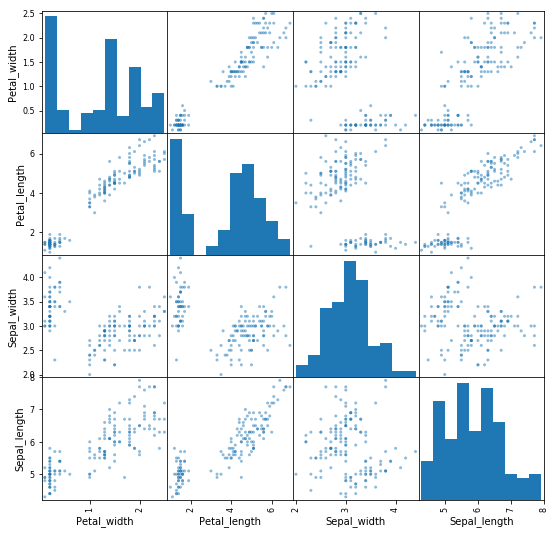

In [33]:
#graphique - croisement deux à deux des variables

scatt_mat = scatter_matrix(df2,figsize=(9,9))[-1]

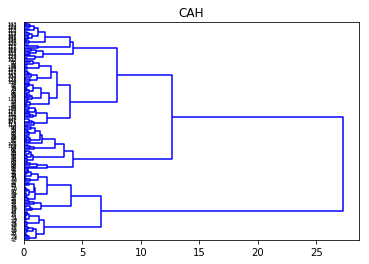

In [34]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(df2_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=df2.index,orientation='right',color_threshold=0)
plt.show()

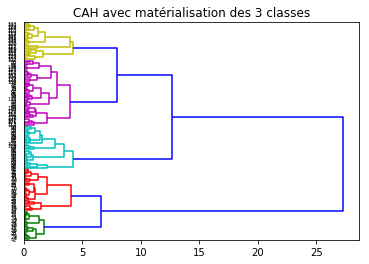

In [40]:
#matérialisation des 4 classes (hauteur t = 10)

plt.title('CAH avec matérialisation des 3 classes')
dendrogram(Z,labels=df2.index,orientation='right',color_threshold=5)
plt.show()

In [41]:
#découpage à la hauteur t = 10 ==> identifiants de 3 groupes obtenus

groupes_cah = fcluster(Z,t=10,criterion='distance')
print(groupes_cah)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [42]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(df2.index[idg],groupes_cah[idg]))

      0
1     0
1    27
1    28
1    29
1    30
1    31
1    32
1    33
1    34
1    35
1    36
1    37
1    38
1    39
1    40
1    42
1    43
1    45
1    46
1    47
1    48
1    49
1    26
1    25
1    44
1    23
1    24
1     1
1     2
1     3
..  ...
3    65
3    75
3    63
3    58
3    56
3    54
3    52
3    51
3    50
3    61
3    76
3    77
3    78
3   110
3   109
3   108
3   107
3   105
3   104
3   103
3   102
3   101
3   100
3    97
3    91
3    86
3    85
3    83
3   112
3   149

[150 rows x 1 columns]


In [44]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)  # on choisit 3 avec l'étude du dessus
kmeans.fit(df2_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(df2.index[idk],kmeans.labels_[idk]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
      0
0    74
0    84
0    83
0    82
0    81
0    80
0    79
0    78
0    73
0    72
0    71
0    87
0    69
0    67
0    66
0    64
0    63
0    62
0    61
0    60
0    59
0    57
0    55
0    68
0    54
0    88
0    90
0   146
0   142
0   138
..  ...
2   137
2    52
2   118
2    50
2    56
2    58
2    65
2    70
2   148
2    75
2    76
2    77
2    85
2    86
2    51
2   102
2   103
2   104
2   105
2   107
2   108
2   109
2   110
2   111
2   112
2   115
2   116
2   117
2   120
2   100

[150 rows x 1 columns]


In [46]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(df2_cr),index = df2.index)
print(dist_data)

            0         1         2
0    3.122419  0.212958  3.972202
1    2.670933  0.996045  3.997873
2    2.970039  0.651984  4.174844
3    2.874395  0.903456  4.178918
4    3.301397  0.402155  4.095273
5    3.511095  1.211548  3.885702
6    3.145342  0.502449  4.199511
7    2.991646  0.091325  3.955328
8    2.916324  1.421747  4.388170
9    2.790622  0.789931  4.037866
10   3.325866  0.789994  3.905064
11   3.047733  0.276181  4.061071
12   2.801319  1.034979  4.144334
13   3.204167  1.334825  4.611658
14   3.896272  1.638656  4.132898
15   4.508153  2.398988  4.486512
16   3.615013  1.207488  4.016253
17   3.057065  0.216188  3.896970
18   3.352198  1.209867  3.710985
19   3.503652  0.867062  4.086616
20   2.811351  0.504016  3.645463
21   3.280391  0.668264  3.930060
22   3.588315  0.686581  4.494724
23   2.558759  0.479456  3.562129
24   2.963400  0.363454  3.970774
25   2.553034  0.990239  3.864026
26   2.827541  0.226831  3.773670
27   3.061737  0.294719  3.878078
28   2.955525 

In [50]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2
row_0            
1       0  49   0
2      29   1   0
3      23   0  48

[0.58175005 0.45937792 0.38509672 0.345511   0.3229212  0.34079114
 0.33593399 0.33148142 0.34926478]


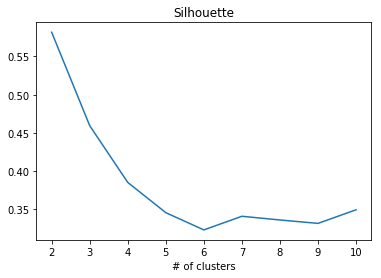

In [51]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(df2_cr)
    res[k] = metrics.silhouette_score(df2_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

[251.34933946 241.9044017  207.25483719 203.26741933 182.42846857
 174.74914726 173.49995757 177.33795457 182.24378996]


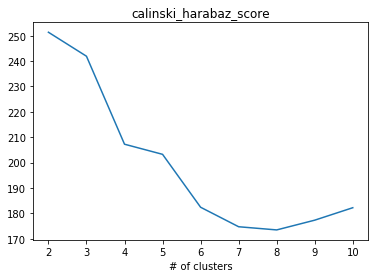

In [53]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(df2_cr)
    res[k] = metrics.calinski_harabaz_score(df2_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [54]:
Interpréttion des classes

SyntaxError: invalid syntax (<ipython-input-54-8a8654c74263>, line 1)

In [55]:
#moyenne par variable

m = df2.mean()

#TSS

TSS = df2.shape[0]*df2.var(ddof=0)
print(TSS)


Petal_width      86.569933
Petal_length    464.325400
Sepal_width      28.306933
Sepal_length    102.168333
dtype: float64


In [56]:
#data.frame conditionnellement aux groupes

gb = df2.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)

0    52
1    50
2    48
dtype: int64


In [57]:
#moyennes conditionnelles

mk = gb.mean()
print(mk)

#pour chaque groupe écart à la moyenne par variable

EMk = (mk-m)**2

#pondéré par les effectifs du groupe

EM = EMk.multiply(nk,axis=0)

   Petal_width  Petal_length  Sepal_width  Sepal_length
0     1.415385      4.365385     2.669231      5.786538
1     0.246000      1.462000     3.428000      5.006000
2     1.958333      5.491667     3.091667      6.777083


In [58]:
#somme des valeurs => BSS

BSS = np.sum(EM,axis=0)
print(BSS)

Petal_width      75.521374
Petal_length    427.033241
Sepal_width      14.758697
Sepal_length     77.074765
dtype: float64


In [59]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable

R2 = BSS/TSS
print(R2)

Petal_width     0.872374
Petal_length    0.919685
Sepal_width     0.521381
Sepal_length    0.754390
dtype: float64


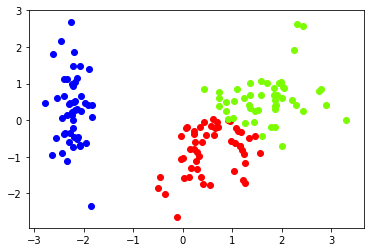

In [60]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(df2_cr)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

In [62]:
#retirer des observations le groupe n°1 du k-means précédent
df2_subset = df2.iloc[kmeans.labels_!=0,:]

print(df2_subset.shape)
print(df2_subset)

(98, 4)
     Petal_width  Petal_length  Sepal_width  Sepal_length
0            0.2           1.4          3.5           5.1
1            0.2           1.4          3.0           4.9
2            0.2           1.3          3.2           4.7
3            0.2           1.5          3.1           4.6
4            0.2           1.4          3.6           5.0
5            0.4           1.7          3.9           5.4
6            0.3           1.4          3.4           4.6
7            0.2           1.5          3.4           5.0
8            0.2           1.4          2.9           4.4
9            0.1           1.5          3.1           4.9
10           0.2           1.5          3.7           5.4
11           0.2           1.6          3.4           4.8
12           0.1           1.4          3.0           4.8
13           0.1           1.1          3.0           4.3
14           0.2           1.2          4.0           5.8
15           0.4           1.5          4.4           5.7
16    

In [63]:
#centrer et réduire
df2_subset_cr = sc.fit_transform(df2_subset.values)
print(df2_subset_cr)

[[-0.99275207 -0.98488645  0.64979112 -0.78970845]
 [-0.99275207 -0.98488645 -0.72261254 -0.99390747]
 [-0.99275207 -1.03326683 -0.17365107 -1.19810649]
 [-0.99275207 -0.93650606 -0.44813181 -1.300206  ]
 [-0.99275207 -0.98488645  0.92427185 -0.89180796]
 [-0.76832369 -0.83974529  1.74771404 -0.48340992]
 [-0.88053788 -0.98488645  0.37531039 -1.300206  ]
 [-0.99275207 -0.93650606  0.37531039 -0.89180796]
 [-0.99275207 -0.98488645 -0.99709327 -1.50440501]
 [-1.10496626 -0.93650606 -0.44813181 -0.99390747]
 [-0.99275207 -0.93650606  1.19875258 -0.48340992]
 [-0.99275207 -0.88812567  0.37531039 -1.09600698]
 [-1.10496626 -0.98488645 -0.72261254 -1.09600698]
 [-1.10496626 -1.13002761 -0.72261254 -1.60650452]
 [-0.99275207 -1.08164722  2.02219477 -0.07501188]
 [-0.76832369 -0.93650606  3.1201177  -0.17711139]
 [-0.76832369 -1.03326683  1.74771404 -0.48340992]
 [-0.88053788 -0.98488645  0.64979112 -0.78970845]
 [-0.88053788 -0.83974529  1.47323331 -0.17711139]
 [-0.88053788 -0.93650606  1.47

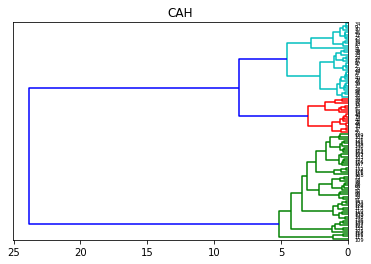

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [66]:
#générer la matrice des liens

Z_subset = linkage(df2_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=df2_subset.index,orientation='left',color_threshold=7)
plt.show()

#groupes

groupes_subset_cah = fcluster(Z_subset,t=11,criterion='distance')
print(groupes_subset_cah)

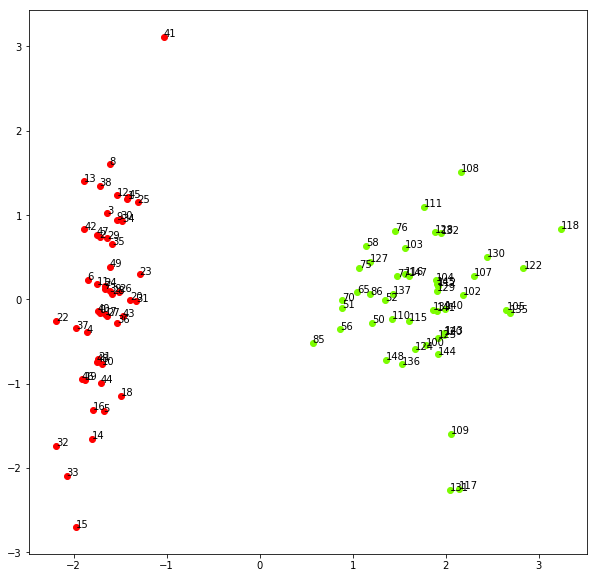

In [67]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(df2_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['lawngreen','red','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(df2_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()